In [0]:
import tensorflow as tf
from tensorflow import keras

In [0]:
class ResNet:
  def __init__(self, input_shape=(64, 64, 3), classes=1000):
    self.model = None
    self.input_shape = input_shape
    self.classes = classes

  def identity_block(self, X, f, filters):
    """
    Aguments:
    X = input tenssor of shape  (m, h, w, c)
    f = shape of the middle CONV's window for the main path
    filters = list containing number of filters
    """
    f1, f2, f3 = filters

    X_shortcut = X

    #First Component
    X = keras.layers.Conv2D(filters=f1, kernel_size=(1, 1), strides=1,
                            padding='valid', activation='relu')(X)
    X = keras.layers.BatchNormalization(axis=3)(X)

    #Seccond Component
    X = keras.layers.Conv2D(filters=f2, kernel_size=(f, f), strides=1,
                            padding='same', activation='relu')(X)
    X = keras.layers.BatchNormalization(axis=3)(X)

    #Third Component
    X = keras.layers.Conv2D(filters=f3, kernel_size=(1, 1), strides=1,
                            padding='valid', activation='relu')(X)
    X = keras.layers.BatchNormalization(axis=3)(X)

    #Shortcut Value to main path
    X = keras.layers.Add()([X, X_shortcut])
    X = keras.layers.Activation('relu')(X)

    return X

  def convolution_block(self, X, f, filters, s=2):
    """
    Arguments:
    X = input tensor of shape (m, h, w, c)
    f = shape of middle CONV's window
    filters = list containing filters fir CONV layers
    s  = stride to be used
    """

    f1, f2, f3 = filters

    X_shortcut = X

    #First Component
    X = keras.layers.Conv2D(filters=f1, kernel_size=(1, 1), strides=s,
                            padding='same', activation='relu')(X)
    X = keras.layers.BatchNormalization(axis=3)(X)

    #Second Component
    X = keras.layers.Conv2D(filters=f2, kernel_size=(f, f), strides=1,
                            padding='same', activation='relu')(X)
    X = keras.layers.BatchNormalization(axis=3)(X)

    #Third Component
    X = keras.layers.Conv2D(filters=f3, kernel_size=(1, 1), strides=1,
                            padding='valid')(X)
    X = keras.layers.BatchNormalization(axis=3)(X)

    #Shortcut Path
    X_shortcut = keras.layers.Conv2D(filters=f3, kernel_size=(1, 1), strides=s,
                                     padding='valid')(X_shortcut)
    X_shortcut = keras.layers.BatchNormalization(axis=3)(X_shortcut)

    #Adding the shortcut value to the main path
    X = keras.layers.Add()([X, X_shortcut])
    X = keras.layers.Activation('relu')(X)

    return X 

  def build_model(self):
    inputs = keras.Input(shape=self.input_shape)

    #Zero Padding
    X = keras.layers.ZeroPadding2D((3, 3))(inputs)

    #Stage 1
    X = keras.layers.Conv2D(filters=64, kernel_size=(7, 7), strides=2,
                            activation='relu')(X)
    X = keras.layers.BatchNormalization(axis=3)(X)
    X = keras.layers.MaxPooling2D((3, 3), strides=2)(X)

    #Stage 2
    X = self.convolution_block(X, f=3, filters=[64, 64, 256], s=1)
    X = self.identity_block(X, 3, [64, 64, 256])
    X = self.identity_block(X, 3, [64, 64, 256])

    #Stage 3
    X = self.convolution_block(X, f=3, filters=[128, 128, 512], s=2)
    X = self.identity_block(X, 3, [128, 128, 512])
    X = self.identity_block(X, 3, [128, 128, 512])
    X = self.identity_block(X, 3, [128, 128, 512])

    #Stage 4
    X = self.convolution_block(X, f=3, filters=[256, 2256, 1024], s=2)
    X = self.identity_block(X, 3, [256, 256, 1024])
    X = self.identity_block(X, 3, [256, 256, 1024])
    X = self.identity_block(X, 3, [256, 256, 1024])
    X = self.identity_block(X, 3, [256, 256, 1024])
    X = self.identity_block(X, 3, [256, 256, 1024])

    #Stage 5
    X = self.convolution_block(X, f=3, filters=[512, 512, 2048], s=2)
    X = self.identity_block(X, 3, [512, 512, 2048])
    X = self.identity_block(X, 3, [512, 512, 2048])

    #Average Pooling
    X =keras.layers.AveragePooling2D((2, 2))(X)

    #Output Layer
    X = keras.layers.Flatten()(X)
    outputs = keras.layers.Dense(self.classes, activation='softmax')(X)

    self.model = keras.Model(inputs=inputs, outputs=outputs)
    
    return self.model

  def compile_model(self):
    self.model.compile(optimizer='adam', loss='categorical_crossentropy',
                       metrics=['accuracy'])
    return self.model

  def train_model(self, x_train, y_train, batch_size=32, epochs=10, val_data=None):
    if val_data != None:
      history = self.model.fit(x_train, y_train, batch_size=batch_size,
                     epochs=epochs)
    else:
      history = self.model.fit(x_train, y_train, batch_size=batch_size,
                     epochs=epochs, validation_data=val_data)
    return history


  def predict(self, image):
    prediction = self.model.predict(image)
    return prediction

  def model_summary(self):
    self.model.summary()

  def plot_model(self, name='model.png'):
    return keras.utils.plot_model(self.model, 'model.png')


In [0]:
resnet_model = ResNet()

In [4]:
resnet_model.build_model()

In [5]:
resnet_model.compile_model()

In [6]:
resnet_model.model_summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 64, 64, 3)]  0                                            
__________________________________________________________________________________________________
zero_padding2d (ZeroPadding2D)  (None, 70, 70, 3)    0           input_1[0][0]                    
__________________________________________________________________________________________________
conv2d (Conv2D)                 (None, 32, 32, 64)   9472        zero_padding2d[0][0]             
__________________________________________________________________________________________________
batch_normalization (BatchNorma (None, 32, 32, 64)   256         conv2d[0][0]                     
______________________________________________________________________________________________

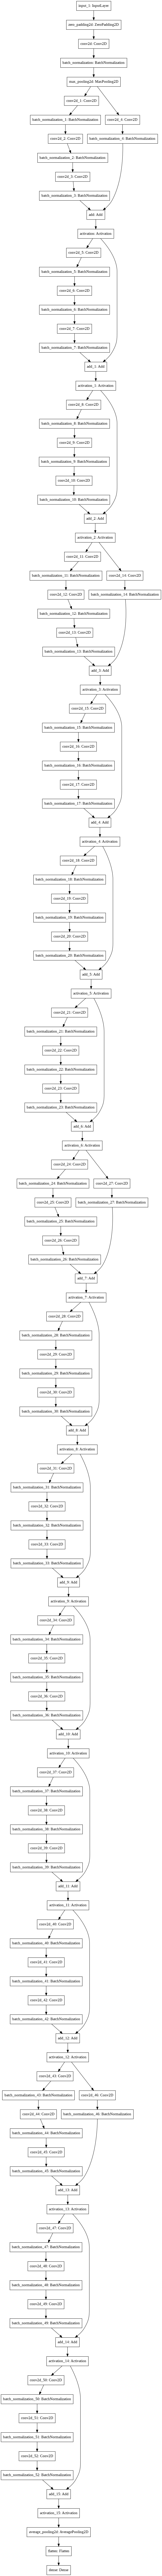

In [7]:
resnet_model.plot_model()